In [64]:
import financedatabase as fd
import pandas as pd
import numpy as np
from functools import lru_cache
import ipywidgets as widgets
from IPython.display import display
from financetoolkit import Toolkit
import matplotlib.pyplot as plt
import math
from statsmodels.tsa.stattools import coint, adfuller
from statsmodels.tools.tools import add_constant
from statsmodels.regression.linear_model import OLS
import yfinance as yf
import datetime
yf.pdr_override()
equities = fd.Equities()

# ML libraries
import itertools
from prophet import Prophet
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics

# Sector
equities_US_sector = equities.options('sector', country='United States')
sector_dataframe=pd.DataFrame(equities_US_sector, columns=['Sector'])

# Industry Group
equities_US_industry_group = equities.options('industry_group', country='United States')
industry_group_dataframe=pd.DataFrame(equities_US_industry_group, columns=['Industry Group'])

# Industry
equities_US_industry = equities.options('industry', country='United States')
industry_dataframe=pd.DataFrame(equities_US_industry, columns=['Industry'])

# Exchanges
equities_US_exchange = np.array(['NYQ', 'PNK', 'NMS', 'ASE', 'NGM', 'NCM', 'NYS', 'BTS', 'NAS', 'PCX'])
equities_US_exchange_full_name = np.array(['New York Stock Exchange', 'OTC Bulletin Board', 'NASDAQ Global Select', 'NYSE MKT', 'Nordic Growth Market', 'NASDAQ Capital Market', 'New York Stock Exchange', 'BATS BZX Exchange', 'NASDAQ Global Select', 'NYSE Arca'])
exchange_dataframe = pd.DataFrame({'Exchange': equities_US_exchange, 'Name': equities_US_exchange_full_name})

# create 4 output widgets
sector_output = widgets.Output()
industry_group_output = widgets.Output()
industry_output = widgets.Output()
exchange_output = widgets.Output()

# display the dataframes side by side
with sector_output:
    display(sector_dataframe)
with industry_group_output:
    display(industry_group_dataframe)
with industry_output:
    display(industry_dataframe)
with industry_output:
    display(exchange_dataframe)

# Layout and display result
sector_output.layout.width = '25%'
industry_group_output.layout.width = '25%'
industry_output.layout.width = '25%'
exchange_output.layout.width = '25%'
widgets.HBox([sector_output, industry_group_output, industry_output, exchange_output])

In [65]:
# Company Overview Screener
@lru_cache(maxsize=None)
def stock_screener():
    done = False
    sector_result = pd.DataFrame()
    print('Pair trading works well with Financials, Materials, Utilities, Real Estate sectors and Airline industry')
    while sector_result.empty:
        sector_input = input('Please enter your sector preferences')
        market_cap_input = input('Please choose one of the 4 main market caps only: Mega Cap, Large Cap, Mid Cap, Small Cap, Micro Cap') 
        sector_result = equities.search(sector= sector_input,
                                        currency = "USD",
                                        country='United States',
                                        market_cap= market_cap_input)
                                        # exchange = exchange_input)

    return sector_result, sector_input, market_cap_input

sector_result = stock_screener()[0]
sector_result


Pair trading works well with Financials, Materials, Utilities, Real Estate sectors and Airline industry


Please enter your sector preferences Materials
Please choose one of the 4 main market caps only: Mega Cap, Large Cap, Mid Cap, Small Cap, Micro Cap Mid Cap


,name,summary,currency,sector,industry_group,industry,exchange,market,country,state,city,zipcode,website,market_cap,isin,cusip,figi,composite_figi,shareclass_figi
symbol,,,,,,,,,,,,,,,,,,,
0A6T.L,Livent Corporation,Livent Corporation manufactures and sells perf...,USD,Materials,Materials,Chemicals,LSE,London Stock Exchange (international),United States,PA,Philadelphia,19104,http://www.livent.com,Mid Cap,US53814L1089,53814L108,NaN,NaN,NaN
0HCB.L,Alcoa Corporation,"Alcoa Corporation, together with its subsidiar...",USD,Materials,Materials,Metals & Mining,LSE,London Stock Exchange (international),United States,PA,Pittsburgh,15212-5858,http://www.alcoa.com,Mid Cap,US0138721065,13872106,NaN,NaN,NaN
0HWG.L,The Chemours Company,The Chemours Company provides performance chem...,USD,Materials,Materials,Chemicals,LSE,London Stock Exchange (international),United States,DE,Wilmington,19899,http://www.chemours.com,Mid Cap,US1638511089,163851108,NaN,NaN,NaN
0JAX.L,Innospec Inc.,"Innospec Inc. develops, manufactures, blends, ...",USD,Materials,Materials,Chemicals,LSE,London Stock Exchange (international),United States,CO,Englewood,80112,http://www.innospecinc.com,Mid Cap,NaN,NaN,NaN,NaN,NaN
0K5R.L,Avient Corporation,Avient Corporation provides specialized polyme...,USD,Materials,Materials,Chemicals,LSE,London Stock Exchange (international),United States,OH,Avon Lake,44012,http://www.avient.com,Mid Cap,US63938C1080,63938C108,NaN,NaN,NaN
0R0U.L,"Coeur Mining, Inc.","Coeur Mining, Inc. explores for, develops, pro...",USD,Materials,Materials,Metals & Mining,LSE,London Stock Exchange (international),United States,IL,Chicago,60603,http://www.coeur.com,Mid Cap,US1921085049,192108504,NaN,NaN,NaN
0U6C.L,Axalta Coating Systems Ltd.,"Axalta Coating Systems Ltd., through its subsi...",USD,Materials,Materials,Chemicals,LSE,London Stock Exchange (international),United States,PA,Philadelphia,19103,http://www.axalta.com,Mid Cap,NaN,NaN,NaN,NaN,NaN
AMR,"Alpha Metallurgical Resources, Inc.","Alpha Metallurgical Resources, Inc. operates a...",USD,Materials,Materials,Metals & Mining,NYQ,New York Stock Exchange,United States,TN,Bristol,37620,http://www.alphametresources.com,Mid Cap,NaN,NaN,NaN,NaN,NaN
ARCH,"Arch Resources, Inc.","Arch Resources, Inc. produces and sells therma...",USD,Materials,Materials,Metals & Mining,NYQ,New York Stock Exchange,United States,MO,Saint Louis,63141,http://www.archrsc.com,Mid Cap,US03940R1077,03940R107,BBG00DZB5DC1,BBG00DZB5D77,BBG00DZB5DD0


In [66]:
@lru_cache(maxsize=None)
def get_historical_data():
    API_KEY = "fOca6kc4cR3xNQnCqGERX6p3CyfxVKmU"
    companies = sector_result.to_toolkit(api_key=API_KEY, start_date="2022-01-01")
    historical_data = companies.get_historical_data()
    return pd.DataFrame(historical_data)

# Call the function to get the result
historical_data = get_historical_data()
historical_data

Obtaining historical data:   7%|███▋                                                    | 4/61 [00:00<00:05,  9.64it/s]

The given start and end date result in no data found for 0A6T.L


Obtaining historical data:  49%|███████████████████████████                            | 30/61 [00:03<00:03,  9.59it/s]

The given start and end date result in no data found for GRA


Obtaining historical data:  66%|████████████████████████████████████                   | 40/61 [00:04<00:02,  9.70it/s]

The given start and end date result in no data found for LTHM


Obtaining historical data:  79%|███████████████████████████████████████████▎           | 48/61 [00:05<00:01,  9.69it/s]

The given start and end date result in no data found for PQG


Obtaining historical data:  93%|███████████████████████████████████████████████████▍   | 57/61 [00:06<00:00,  9.63it/s]

The given start and end date result in no data found for UFS
The given start and end date result in no data found for UNVR


Obtaining historical data: 100%|███████████████████████████████████████████████████████| 61/61 [00:06<00:00,  9.49it/s]
ZY: No timezone found, symbol may be delisted


The given start and end date result in no data found for ZY
No data found for the following tickers: 0A6T.L, GRA, LTHM, PQG, UFS, UNVR, ZY


Open                                                          \
           0A6T.L  0HCB.L  0HWG.L   0JAX.L  0K5R.L 0R0U.L  0U6C.L     AMR   
2022-01-01    0.0 57.3722 31.0986  92.1874 19.7694 4.9925 33.2212 57.2495   
2022-01-02    0.0 57.7454 31.4637  92.2663 19.8346  5.045 33.4108 57.7685   
2022-01-03    0.0 58.1186 31.8288  92.3452 19.8997 5.0975 33.6004 58.2875   
2022-01-04    0.0 58.4918 32.1939   92.424 19.9648   5.15   33.79 60.4709   
2022-01-05    0.0  57.222 32.9068  92.5029 20.2116  5.375   33.89 60.9645   
...           ...     ...     ...      ...     ...    ...     ...     ...   
2024-12-11    0.0    40.9  21.012 116.7422 14.8868 7.0695   39.07  237.84   
2024-12-12    0.0   39.84   19.61 116.1798   15.04   7.01   38.63  225.64   
2024-12-13    0.0 39.3502 19.4824   114.91     NaN   6.77  38.675  229.96   
2024-12-14    0.0     NaN     NaN      NaN     NaN    NaN     NaN     NaN   
2024-12-15    0.0     NaN     NaN      NaN     NaN    NaN     NaN     NaN   

                           ... Excess Volatility                         \
              ARCH   ARLP  ...               UEC   UFPI UFS UNVR   USLM   
2022-01-01 70.1236 9.0527  ...            0.0459 0.0229 NaN  NaN 0.0224   
2022-01-02 70.6769 9.1272  ...            0.0459 0.0229 NaN  NaN 0.0224   
2022-01-03 71.2302 9.2018  ...            0.0459 0.0229 NaN  NaN 0.0224   
2022-01-04 71.5313 9.3967  ...            0.0459 0.0229 NaN  NaN 0.0224   
2022-01-05 71.1144 9.9235  ...            0.0459 0.0229 NaN  NaN 0.0224   
...            ...    ...  ...               ...    ...  ..  ...    ...   
2024-12-11  155.55   25.9  ...            0.0459 0.0229 NaN  NaN 0.0224   
2024-12-12   153.1   26.1  ...            0.0459 0.0229 NaN  NaN 0.0224   
2024-12-13  154.67  26.28  ...            0.0459 0.0229 NaN  NaN 0.0224   
2024-12-14     NaN    NaN  ...               NaN    NaN NaN  NaN    NaN   
2024-12-15     NaN    NaN  ...               NaN    NaN NaN  NaN    NaN   

                                               
             WDFC      X   X.SN  ZY Benchmark  
2022-01-01 0.0218 0.0338 0.0265 NaN     0.013  
2022-01-02 0.0218 0.0338 0.0265 NaN     0.013  
2022-01-03 0.0218 0.0338 0.0265 NaN     0.013  
2022-01-04 0.0218 0.0338 0.0265 NaN     0.013  
2022-01-05 0.0218 0.0338 0.0265 NaN     0.013  
...           ...    ...    ...  ..       ...  
2024-12-11 0.0218 0.0338 0.0265 NaN     0.013  
2024-12-12 0.0218 0.0338 0.0265 NaN     0.013  
2024-12-13 0.0218 0.0338 0.0265 NaN     0.013  
2024-12-14    NaN    NaN    NaN NaN       NaN  
2024-12-15    NaN    NaN    NaN NaN       NaN  

[1080 rows x 732 columns]

In [67]:
# Clean data such that the Adj Close is NaN, if so remove that row
Ticker_list = []
def filter(historical_data):
    for i in historical_data:
        if i[0] == 'Adj Close':
            if i[1] not in Ticker_list and i[1] != "Benchmark":
                Ticker_list.append(i[1])
            if historical_data[i].isnull().any():
                historical_data = historical_data[~historical_data[i].isnull()]

    # Check for inf across DataFrame
    has_inf = np.isinf(historical_data.values)
    has_inf = has_inf.any(axis=1)  

    # Filter out rows with inf 
    historical_data = historical_data[~has_inf]
    return historical_data

def remove(adj_close_data):
    # Remove Benchmark column from the adj_close_data and only take the Adjusted Close column
    adj_close_data  = adj_close_data.drop('Benchmark', axis = 1)
    adj_close_data = adj_close_data[adj_close_data.columns[(adj_close_data != 0).any()]]
    return adj_close_data

adj_close_data = filter(historical_data)['Adj Close']
adj_close_data = remove(adj_close_data)
adj_close_data

,0HCB.L,0HWG.L,0JAX.L,0K5R.L,0R0U.L,0U6C.L,AMR,ARCH,ARLP,ASH,...,SLVM,SMG,SUM,SXT,UEC,UFPI,USLM,WDFC,X,X.SN
2022-01-01,57.5588,31.1762,92.1874,19.5106,5.0412,33.1452,58.5691,70.5971,9.2283,102.1357,...,26.3852,144.5134,39.41,93.274,3.4667,88.4754,25.5316,232.9026,23.3458,25.2418
2022-01-02,57.0038,31.6189,92.2663,19.7116,5.1325,33.2968,59.183,70.6898,9.3341,101.6113,...,26.5013,145.5826,39.351,93.0778,3.5833,88.0309,25.6105,232.5657,23.385,25.2418
2022-01-03,56.4489,32.0616,92.3452,19.9127,5.2237,33.4484,59.7969,70.7824,9.44,101.0868,...,26.6175,146.6517,39.292,92.8817,3.7,87.5863,25.6894,232.2289,23.4242,25.2418
2022-01-04,55.8939,32.5043,92.424,20.1138,5.315,33.6,60.8126,70.435,9.8586,101.4015,...,28.3035,142.5533,39.7542,92.8256,3.81,90.1473,25.7308,229.6166,24.1583,25.2418
2022-01-05,57.7221,32.6576,92.5029,20.3349,5.23,33.89,59.5975,70.3424,9.7648,100.0474,...,28.0962,144.068,38.7709,90.9106,3.86,88.1372,25.5079,221.8559,24.726,25.2418
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-08,42.7617,21.4433,116.6144,15.0988,7.0,39.9628,229.6867,154.3633,26.0833,76.0167,...,91.0633,74.7833,50.8133,78.0333,8.1833,133.3733,147.54,271.41,38.8433,38.63
2024-12-09,42.8425,21.745,116.2858,14.9732,7.235,40.02,232.24,153.9,25.89,76.28,...,91.28,74.44,50.82,78.0,8.01,133.54,145.04,270.21,39.04,38.63
2024-12-10,40.912,21.05,115.9572,14.87,7.06,39.4747,235.42,153.99,25.67,75.87,...,89.47,73.74,50.9,76.64,8.11,130.53,143.62,272.17,35.26,38.63
2024-12-11,39.8124,20.08,116.7422,14.8868,7.24,38.9705,228.34,154.67,26.03,74.94,...,89.28,73.55,50.93,77.0,8.46,132.19,146.57,270.23,34.93,38.63


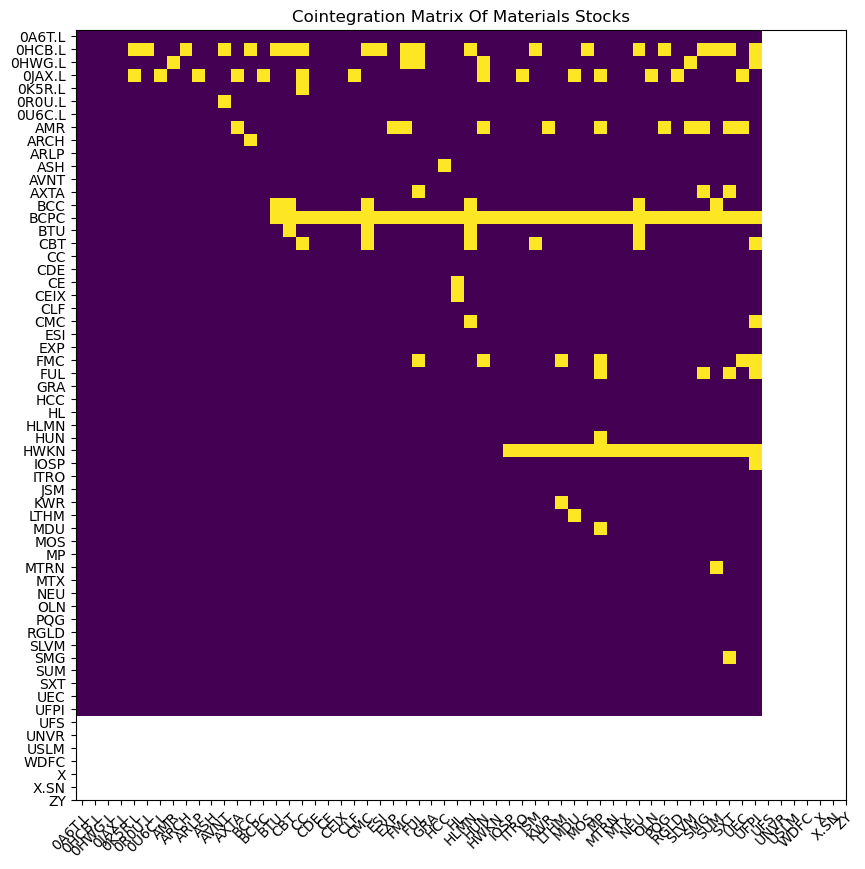

In [68]:
# Cointegration Test to find the best pairs
def cointegration_checker(stock_dataframe):
    cointegrated_pairs = []
    
    k = stock_dataframe.shape[1]
    #getting the number of columns (tickers)
    p_values = np.ones( (k, k) )
    
    
    keys = stock_dataframe.keys()
    #getting the column names (tickers) from df
    
    for i in range(k-1):
        for j in range(i+1, k):
            
            Asset_1 = stock_dataframe[keys[i]]
            Asset_2 = stock_dataframe[keys[j]]
            
            #iterating through the df and testing cointegration for all pairs of tickers
            if Asset_1.min() != Asset_1.max() and Asset_2.min() != Asset_2.max():
                Coint_Test = coint(Asset_1, Asset_2)
            
                pvalue = Coint_Test[1]
                # statsmodels coint returns p-values (our primary concern) in the 1th index slot
                p_values[i, j] = pvalue
                #p value matrix where the output of the coint test is the ith, jth index
                if pvalue < 0.02:
                    cointegrated_pairs.append((keys[i], keys[j], pvalue))
                
    return p_values, cointegrated_pairs

# # Display the results
pvalues, pairs = cointegration_checker(adj_close_data)

fig, ax = plt.subplots(figsize=(25, 10))
im = ax.imshow(pvalues <= .02)

ax.set_xticks(np.arange(len(Ticker_list)))
ax.set_yticks(np.arange(len(Ticker_list)))

ax.set_xticklabels(Ticker_list)
ax.set_yticklabels(Ticker_list)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

ax.set_title(f"Cointegration Matrix Of {stock_screener()[1]} Stocks")
plt.show()

def myfunc(n):
    return n[2]

pairs.sort(key = myfunc, reverse = True)

In [69]:
res1 = []
for i in pairs:
    placeholder, pvalue, placeholder2 = coint(adj_close_data[i[1]][0:252], adj_close_data[i[0]][0:252])
    print(f"The pvalue of the augmented Engle-Granger two-step cointegration test between {i[1]} and {i[0]} is", pvalue)

The pvalue of the augmented Engle-Granger two-step cointegration test between BCC and 0K5R.L is 0.14459382985774016
The pvalue of the augmented Engle-Granger two-step cointegration test between HWKN and CBT is 0.7938289877547094
The pvalue of the augmented Engle-Granger two-step cointegration test between WDFC and 0HWG.L is 0.244128049262687
The pvalue of the augmented Engle-Granger two-step cointegration test between AMR and 0K5R.L is 0.23015679811196826
The pvalue of the augmented Engle-Granger two-step cointegration test between NEU and IOSP is 0.33200791196159407
The pvalue of the augmented Engle-Granger two-step cointegration test between MDU and CC is 0.8493259834747444
The pvalue of the augmented Engle-Granger two-step cointegration test between MTX and 0HWG.L is 0.31561369997019234
The pvalue of the augmented Engle-Granger two-step cointegration test between IOSP and 0K5R.L is 0.10869913289437622
The pvalue of the augmented Engle-Granger two-step cointegration test between SUM 

In [70]:
res = []
def stock_pair(pairs):
    for i in range(len(pairs)):
        Asset_1 = adj_close_data[pairs[i][1]]
        Asset_2 =  adj_close_data[pairs[i][0]]
        price_ratio = Asset_1/Asset_2
        if price_ratio.isin([np.inf, -np.inf]).any():
            pass
        elif price_ratio.isna().any():
            pass
        elif price_ratio.max() == price_ratio.min():
            pass
        else:
            result_price_ratio = adfuller(price_ratio, autolag = "AIC")
        
            #Determine which of the spread or the price ratio is stationary
            const  = add_constant(Asset_1)
            results = OLS(Asset_2, const).fit()
            coef = results.params[pairs[i][1]]
            spread = Asset_2 - (coef * Asset_1)
            result_spread =adfuller(price_ratio, autolag = "AIC")
            
            lst = []
            if result_price_ratio[1] > 0.1:
                lst.append("Price Ratio is not stationary")
            else:
                lst.append("Price Ratio is stationary")
        
            if result_spread[1] > 0.1:
                lst.append("Spread is not stationary")
            else:
                lst.append("Spread is stationary")
        
            if lst[0] == "Price Ratio is not stationary":
                print(f"Since {lst[0]}, then I would suggest you choose a different pair because {lst[1]}, which makes the strategy fail as we won't be able to find their divergence at all.")
            else:
                res.append(i)
                print(f"Yes, the pair of {pairs[i][1]} and {pairs[i][0]} works well as {lst[0]} and will likely fluctuate around a mean of {price_ratio.mean()} {[i]}")
    return res

In [71]:
res = stock_pair(pairs)
res

Since Price Ratio is not stationary, then I would suggest you choose a different pair because Spread is not stationary, which makes the strategy fail as we won't be able to find their divergence at all.
Since Price Ratio is not stationary, then I would suggest you choose a different pair because Spread is not stationary, which makes the strategy fail as we won't be able to find their divergence at all.
Since Price Ratio is not stationary, then I would suggest you choose a different pair because Spread is not stationary, which makes the strategy fail as we won't be able to find their divergence at all.
Since Price Ratio is not stationary, then I would suggest you choose a different pair because Spread is not stationary, which makes the strategy fail as we won't be able to find their divergence at all.
Since Price Ratio is not stationary, then I would suggest you choose a different pair because Spread is not stationary, which makes the strategy fail as we won't be able to find their dive

[7,
 12,
 15,
 21,
 23,
 24,
 28,
 30,
 31,
 32,
 35,
 38,
 44,
 49,
 50,
 53,
 54,
 58,
 59,
 61,
 65,
 66,
 69,
 75,
 77,
 78,
 79,
 81,
 85,
 86,
 88,
 89,
 91,
 92,
 93,
 94,
 95,
 99,
 100,
 104,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 122,
 123,
 129,
 131,
 152,
 153]

In [72]:
done = False
lst = []
while not done:
    index = int(input("Enter the index of your chosen pair please: "))
    if index not in res:
        pass
    else:
        lst.append(index)
        consider = input("Do you want to reconsider your options? (y/n): ")
        if consider.lower() == 'n':
            done = True

Enter the index of your chosen pair please:  15
Do you want to reconsider your options? (y/n):  n


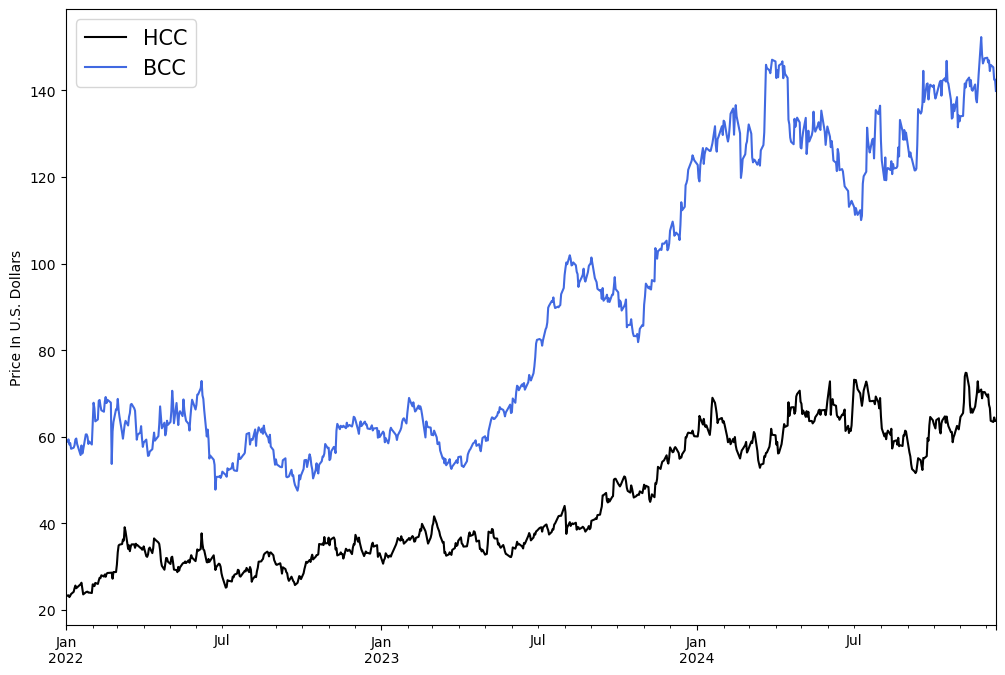

In [73]:
for i in lst:
    plt.figure(figsize=(12,8))
    adj_close_data[pairs[i][1]].plot(color = 'black')
    adj_close_data[pairs[i][0]].plot(color = 'royalblue')
    plt.legend([pairs[i][1], pairs[i][0]], prop={'size': 15})
    plt.ylabel('Price In U.S. Dollars')
    plt.show()

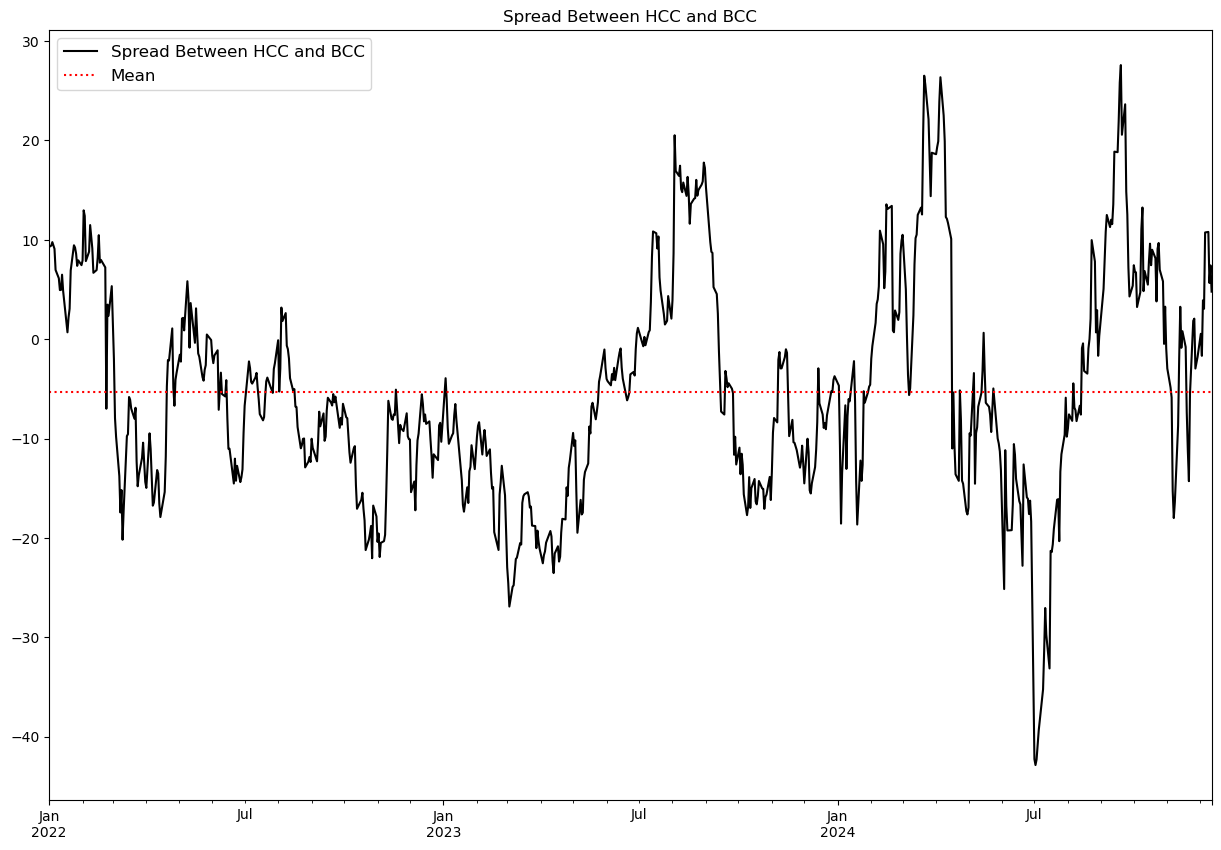

In [74]:
for i in lst:
    adj_close_data = pd.DataFrame(adj_close_data)
    Asset_1 = adj_close_data[pairs[i][1]]
    Asset_2 =  adj_close_data[pairs[i][0]]

    #calculating the spread
    Asset_1  = add_constant(Asset_1)
    results = OLS(Asset_2, Asset_1).fit()

    coef = results.params[pairs[i][1]]
    Asset_1 = Asset_1[pairs[i][1]]

    spread = Asset_2 - (coef * Asset_1)
    spread.plot(figsize=(15,10), color = 'black')
    begin_date = adj_close_data.index[0].strftime('%Y-%m-%d')
    end_date = adj_close_data.index[len(adj_close_data.index) - 1].strftime('%Y-%m-%d')
    plt.xlim(begin_date, end_date)
    plt.axhline(spread.mean(), color='red', linestyle=':')
    plt.legend([f"Spread Between {pairs[i][1]} and {pairs[index][0]}", 'Mean'], prop={'size': 12});
    plt.title(f"Spread Between {pairs[i][1]} and {pairs[index][0]}")
    plt.show()

In [75]:
# Create a list to store output containers
output_containers = []

for i in lst:
    Asset_1 = adj_close_data[pairs[i][1]]
    Asset_2 = adj_close_data[pairs[i][0]]
    price_ratio = Asset_1 / Asset_2
    spread = Asset_1 - Asset_2  # Assuming you have defined spread elsewhere

    # Create output containers for each iteration
    price_ratio_output = widgets.Output()
    spread_output = widgets.Output()

    with price_ratio_output:
        result_price_ratio = adfuller(price_ratio, autolag="AIC")
        display(f'ADF Statistic for Price Ratio: {result_price_ratio[0]}')
        display(f'n_lags: {result_price_ratio[1]}')
        display(f'p-value: {result_price_ratio[1]}')
        for key, value in result_price_ratio[4].items():
            display('Critial Values:')
            display(f' {key}, {value}')
    with spread_output:
        result_spread = adfuller(spread, autolag="AIC")
        display(f'ADF Statistic for spread: {result_spread[0]}')
        display(f'n_lags: {result_spread[1]}')
        display(f'p-value: {result_spread[1]}')
        for key, value in result_spread[4].items():
            display('Critial Values:')
            display(f' {key}, {value}')
    # Append output containers to the list
    output_containers.append(widgets.HBox([price_ratio_output, spread_output]))

# Display all output containers
display(widgets.VBox(output_containers))

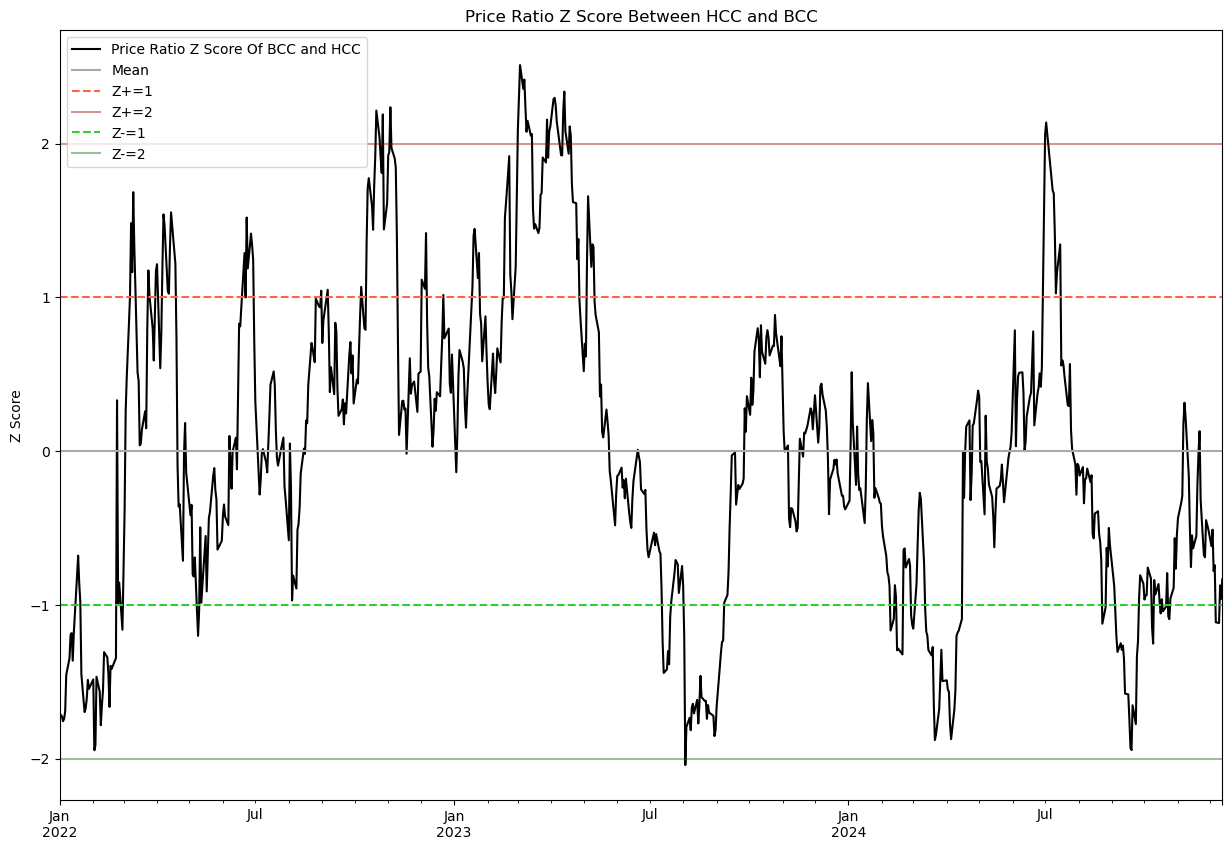

In [76]:
# Convert Price Ratio to Z-score for normalization
for i in lst:
    Asset_1 = adj_close_data[pairs[i][1]]
    Asset_2 = adj_close_data[pairs[i][0]]
    price_ratio = Asset_1 / Asset_2
    price_ratio_z_score = (price_ratio - price_ratio.mean()) / np.std(price_ratio)

    price_ratio_z_score.plot(figsize=(15,10), color = 'black')
    plt.axhline(price_ratio_z_score.mean(), color = 'darkgrey' )
    plt.axhline(1, color='tomato', linestyle='dashed')
    plt.axhline(2, color='darkred', alpha = .4)
    plt.axhline(-1, color='limegreen', linestyle='dashed')
    plt.axhline(-2, color='darkgreen', alpha = .4)
    plt.xlim(begin_date, end_date)
    plt.legend([f'Price Ratio Z Score Of {pairs[i][0]} and {pairs[i][1]}', 'Mean', 'Z+=1', 'Z+=2', 'Z-=1', 'Z-=2' ]);
    plt.title(f"Price Ratio Z Score Between {pairs[i][1]} and {pairs[i][0]}")
    plt.ylabel('Z Score')

    plt.show()

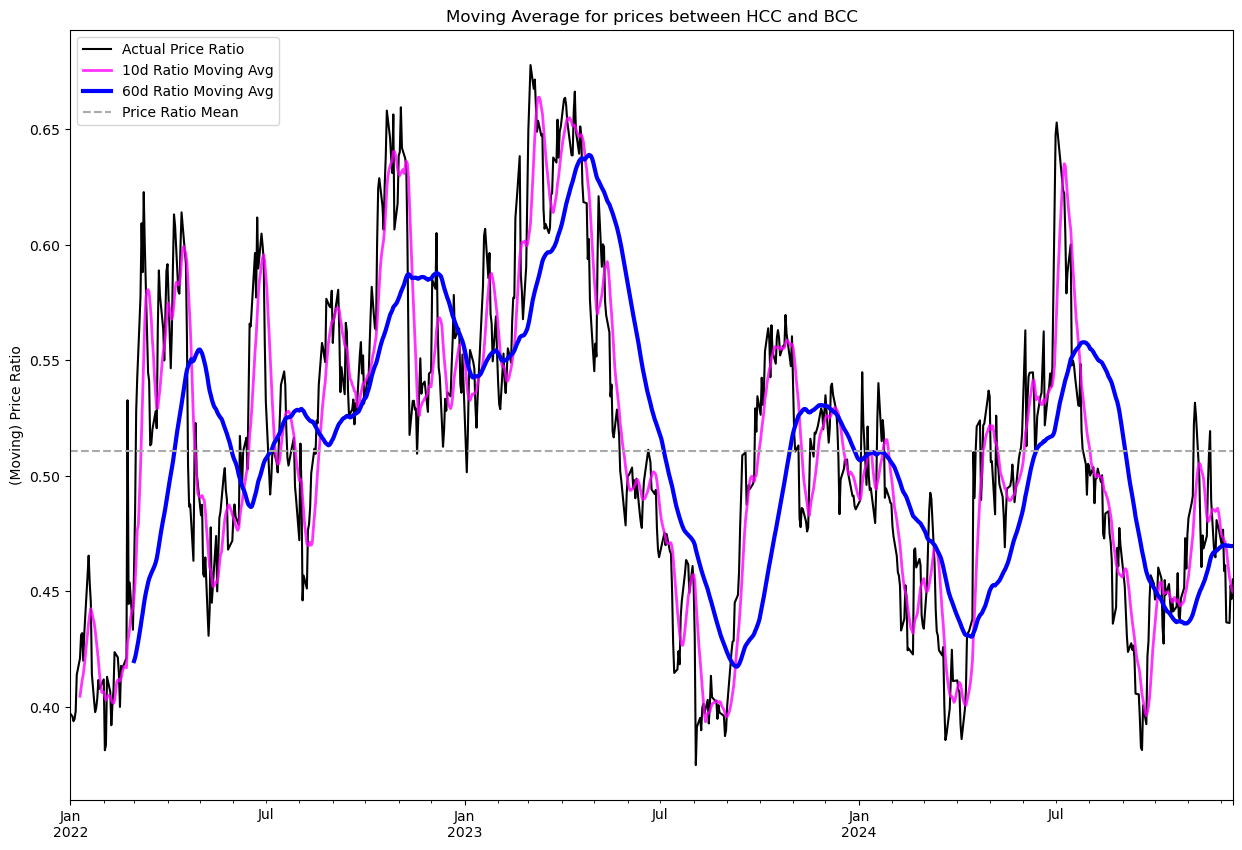

In [77]:
# Moving Averages for 10 and 60 days
for i in lst:
    Asset_1 = adj_close_data[pairs[i][1]]
    Asset_2 = adj_close_data[pairs[i][0]]
    price_ratio = Asset_1 / Asset_2
    price_ratio_10D_MAVG = price_ratio.rolling(window=10, center = False).mean() 
    price_ratio_60D_MAVG = price_ratio.rolling(window=60, center = False).mean() 

    plt.figure(figsize=(15, 10))
    price_ratio.plot(color = 'black')
    price_ratio_10D_MAVG.plot(color = 'magenta', linewidth=2, alpha = .8)
    price_ratio_60D_MAVG.plot(color = 'b', linewidth=3)
    plt.axhline(price_ratio.mean(), color = 'darkgrey', linestyle = 'dashed' )
    plt.legend(['Actual Price Ratio', '10d Ratio Moving Avg', '60d Ratio Moving Avg', 'Price Ratio Mean'])
    plt.title(f"Moving Average for prices between {pairs[i][1]} and {pairs[i][0]}")
    plt.ylabel('(Moving) Price Ratio')
    plt.show()

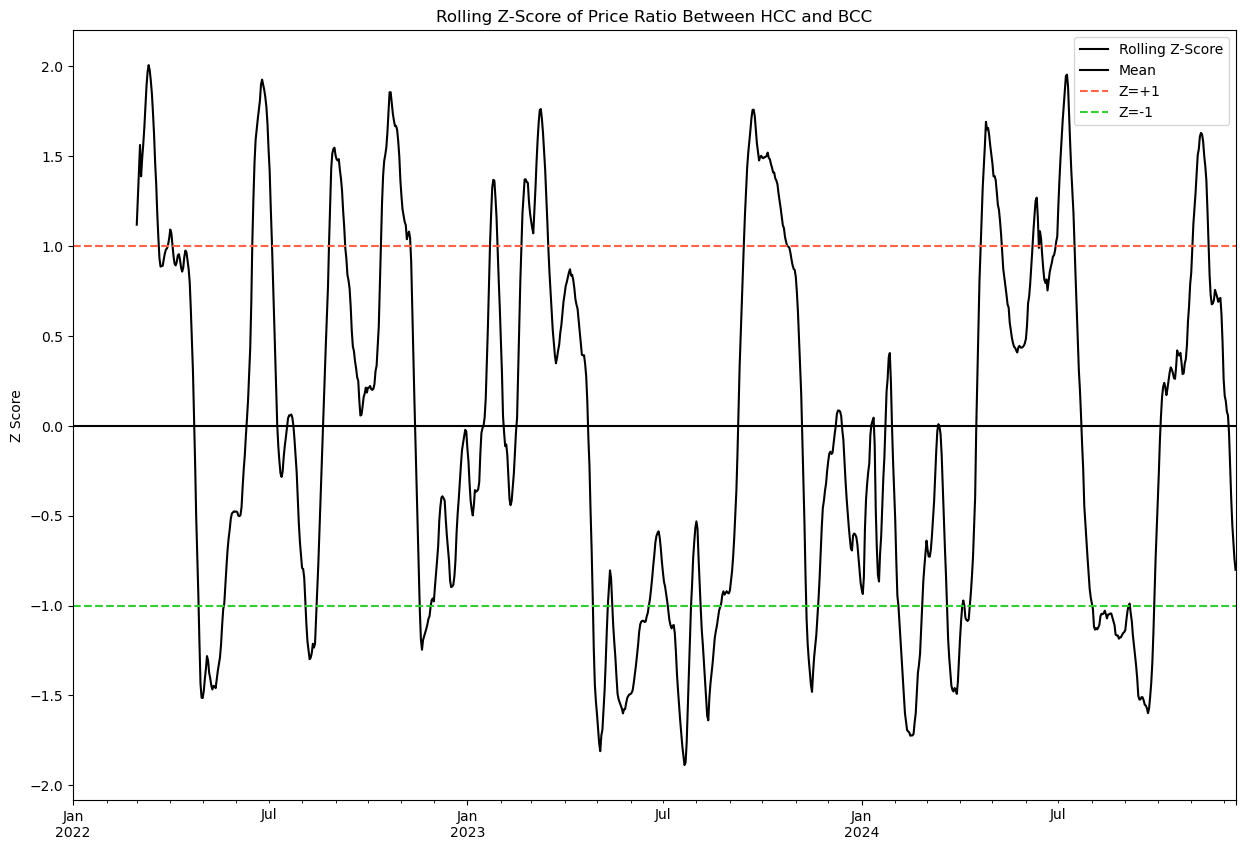

In [78]:
# Moving Average Z-Scores
for i in lst:
    Asset_1 = adj_close_data[pairs[i][1]]
    Asset_2 = adj_close_data[pairs[i][0]]
    price_ratio = Asset_1 / Asset_2
    STD_60 = price_ratio.rolling(window=60, center = False).std()
    Rolling_Z_Score = ((price_ratio_10D_MAVG - price_ratio_60D_MAVG)/STD_60)
    Rolling_Z_Score.plot(figsize=(15,10), color = 'black')

    plt.xlim(begin_date, end_date)
    plt.axhline(0, color='black')
    plt.axhline(1, color='tomato', linestyle='dashed')
    plt.axhline(-1, color='limegreen', linestyle='dashed')
    plt.legend(['Rolling Z-Score', 'Mean', 'Z=+1', 'Z=-1'])
    plt.title(f"Rolling Z-Score of Price Ratio Between {pairs[i][1]} and {pairs[i][0]}")
    plt.ylabel('Z Score')
    plt.show()

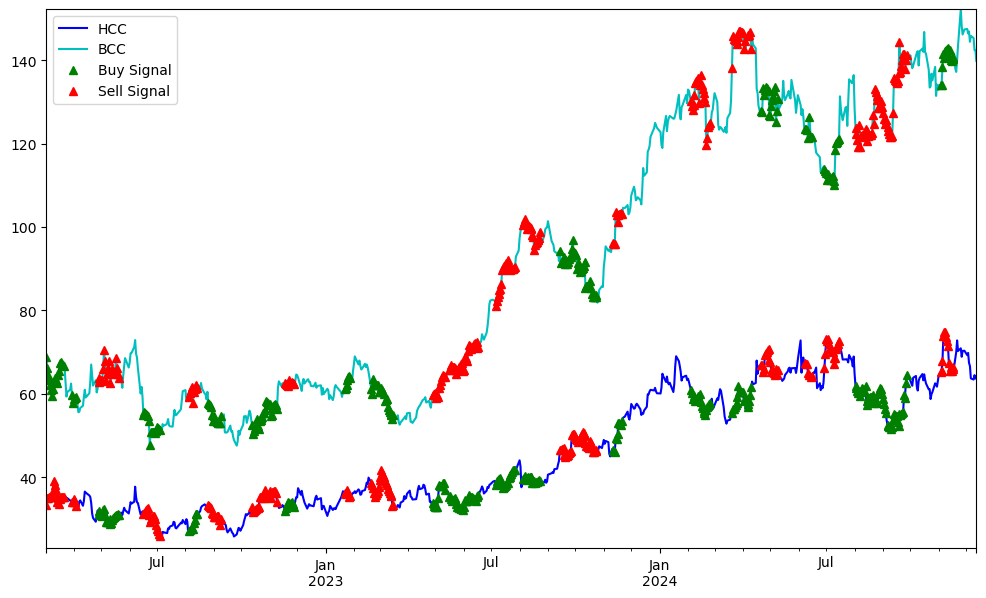

In [79]:
for i in lst:
    Asset_1 = adj_close_data[pairs[i][1]]
    Asset_2 = adj_close_data[pairs[i][0]]
    price_ratio = Asset_1 / Asset_2
    
    plt.figure(figsize=(12,7))
    buy = price_ratio.copy()
    sell = price_ratio.copy()
    buy[Rolling_Z_Score>-1] = 0
    sell[Rolling_Z_Score<1] = 0
    S1 = Asset_1
    S2 = Asset_2

    S1[60:].plot(color='b')
    S2[60:].plot(color='c')
    buyR = 0*S1.copy()
    sellR = 0*S1.copy()

    # When you buy the ratio, you buy stock S1 and sell S2
    buyR[buy!=0] = S1[buy!=0]
    sellR[buy!=0] = S2[buy!=0]

    # When you sell the ratio, you sell stock S1 and buy S2
    buyR[sell!=0] = S2[sell!=0]
    sellR[sell!=0] = S1[sell!=0]

    buyR[60:].plot(color='g', linestyle='None', marker='^')
    sellR[60:].plot(color='r', linestyle='None', marker='^')
    x1, x2, y1, y2 = plt.axis()
    plt.axis((x1, x2, min(S1.min(), S2.min()), max(S1.max(), S2.max())))
    plt.legend([pairs[i][1], pairs[i][0], 'Buy Signal', 'Sell Signal'])
    plt.show()

In [80]:
# Kalman Filter for Pair Trading: avoid Moving Average and have better estimate of z_score
class MyKalmanFilter:
    def __init__(self, delta=1e-4, R=1e-3):
        # measurement noise variance
        self.R = R

        # co-variance of process noise(2 dimensions)
        self.Q = delta / (1-delta) * np.eye(2)

        # state (slope, intercept) will be (2 x n), we will initialize with just one column at first
        self.x = np.zeros((2, 1))     

        # state covariance
        self.P = np.zeros((2,2))     

    def step_forward(self, y1, y2):
        # Before entering the equations, let's define H as (1, 2) matrix
        H = np.array([y2, 1])[None]
        # and define z
        z = y1

        ## TIME UPDATE ##
        # first thing is to predict new state as the previous one (2x1)
        x_hat = self.x[:, -1][..., None]

        # then, the uncertainty or covariance prediction 
        P_hat = self.P + self.Q

        ## MEASUREMENT UPDATE ##
        # calc the Kalman gain
        K = P_hat.dot(H.T)/(H.dot(P_hat.dot(H.T))+self.R)

        # state update part 1 (measurement estimation)
        z_hat = H.dot(x_hat)
        # state update part 2
        x = x_hat + K.dot(z-z_hat)

        # uncertainty update
        self.P = (np.eye(2)-K.dot(H)).dot(P_hat)

        # append the new state to the vector
        self.x = np.concatenate([self.x, x], axis=1)

        return x, P_hat, K, z_hat

In [81]:
# Pair Trading Simulation
def trading_simulation(Asset1, Asset2, window1, window2, leverage, stop_loss, Kalman_Filter):
    # calculating the z score with moving averages as shown in previous sections
    price_ratio = Asset1/Asset2
    moving_average1 = price_ratio.rolling(window=window1).mean()
    moving_average2 = price_ratio.rolling(window=window2).mean()
    std = price_ratio.rolling(window=window2).std()
    z_score = ((moving_average1-moving_average2)/std)
    
    # Decide whether to use Kalmin Filter or not
    if Kalman_Filter == False:
        Kalman = z_score
    else:
        z_score = Kalman = pd.Series(series)
        # Reset index  
        Kalman.reset_index(drop=True, inplace=True)

        # Set index to match series1
        Kalman.index = z_score.index
    
    profit, profit_high, profit_low = 0,0,0
    ratio_high_sell, ratio_high_buy, ratio_low_buy, ratio_low_sell = 0, 0, 0, 0
    low_trade_total, high_trade_total, = 0,0
    count_high, count_low = 0,0
    old_profit_high, old_profit_low = 0,0
    high_hit_rate, low_hit_rate = [], []
    low_dic, high_dic = {}, {}
    Asset1_shares, Asset2_shares = 0,0
    open_trade = 0
    potential_loss_high, potential_loss_low  = 0,0
    
    df = pd.DataFrame(columns = ['Date', 'Profit'])
    
    # Initialize trading log
    trading_log = pd.DataFrame(columns=['Date', 'Asset', 'Action', 'Price', 'Quantity', 'Trade_Type'])
    
    for i in range(len(price_ratio)):
        date = Asset1.index[i]
        if Kalman.loc[i] > 1.25 and open_trade == 0: 
        #if the price ratio z score is high we will 'sell' the ratio 
        
            #calculating the maximum number of shares for each stock; positions are weighted equally
            Asset1_shares = (leverage // 100) // Asset1.iloc[i]
            Asset2_shares = (leverage // 100) // Asset2.iloc[i]
            
            
            #selling the ratio means you sell the higher stock (STT) and buy the lower stock (C)
            ratio_high_sell = Asset1.iloc[i] * Asset1_shares
            ratio_high_buy = Asset2.iloc[i] * Asset2_shares
            
                
            #tracking the number of trades for profit calculation and overall frequency
            count_high += 1
            high_trade_total +=1
            #checker count high with tracker
            open_trade = 1

            # Log trade
            trading_log = pd.concat([trading_log, pd.DataFrame([
                {'Date': date, 'Asset': pairs[index][1], 'Action': 'Sell', 'Price': Asset1.iloc[i], 'Quantity': Asset1_shares, 'Trade_Type': 'High'},
                {'Date': date, 'Asset': pairs[index][0], 'Action': 'Buy', 'Price': Asset2.iloc[i], 'Quantity': Asset2_shares, 'Trade_Type': 'High'}
            ])])

##############################################################################################################################            
        elif Kalman.iloc[i] < -1.25 and open_trade == 0:
        #if the price ratio z score is low we will 'buy' the ratio 
        
            #calculating the maximum number of shares for each stock; positions are weighted equally
            Asset1_shares = (leverage // 2) // Asset1.iloc[i]
            Asset2_shares = (leverage // 2) // Asset2.iloc[i]
            
            #'Buying' the ratio means you buy the higher stock (STT) and sell the lower stock (C)
            ratio_low_buy = Asset1.iloc[i] * Asset1_shares
            ratio_low_sell = Asset2.iloc[i] * Asset2_shares
            
            count_low += 1
            low_trade_total +=1
            open_trade = 1

            # Log trade
            trading_log = pd.concat([trading_log, pd.DataFrame([
                {'Date': date, 'Asset': pairs[index][1], 'Action': 'Buy', 'Price': Asset1.iloc[i], 'Quantity': Asset1_shares, 'Trade_Type': 'Low'},
                {'Date': date, 'Asset': pairs[index][0], 'Action': 'Sell', 'Price': Asset2.iloc[i], 'Quantity': Asset2_shares, 'Trade_Type': 'Low'}
            ])])

##############################################################################################################################            
        if open_trade == 1 and (abs(Kalman.iloc[i]) > .5):

            potential_loss_high = ((ratio_high_sell - (Asset1.iloc[i] * Asset1_shares * count_high)) + ((Asset2.iloc[i]*Asset2_shares*count_high) - ratio_high_buy))
            potential_loss_low = (((Asset1.iloc[i]*Asset1_shares*count_low) - ratio_low_buy) + (ratio_low_sell - (Asset2.iloc[i]*Asset2_shares*count_low)))
            #tracking the current profit from high / low positions 
            
            if potential_loss_high < -stop_loss or potential_loss_low < -stop_loss:
            # if potential losses exceed stop loss then we will cut the positions
            
                old_profit_high = profit_high
                old_profit_low = profit_low
                profit_high += ratio_high_sell - (Asset1.iloc[i] * Asset1_shares * count_high)
                profit_high += (Asset2.iloc[i]*Asset2_shares*count_high) - ratio_high_buy
            
                if (profit_high-old_profit_high) != 0:
                    high_hit_rate.append(profit_high-old_profit_high)
                    high_dic[Asset1.index[i].strftime('%Y-%m-%d')] = (profit_high-old_profit_high)
                
                profit_low += (Asset1.iloc[i]*Asset1_shares*count_low) - ratio_low_buy
                profit_low += ratio_low_sell - (Asset2.iloc[i]*Asset2_shares*count_low)
                
                if (profit_low-old_profit_low) != 0:
                    low_hit_rate.append(profit_low-old_profit_low)
                    low_dic[Asset1.index[i].strftime('%Y-%m-%d')] = (profit_low-old_profit_low)
            
                ratio_high_sell, ratio_high_buy, ratio_low_buy, ratio_low_sell = 0, 0, 0, 0
                count_high,count_low = 0,0
                open_trade = 0
                
                # Log trade
                trading_log = pd.concat([trading_log, pd.DataFrame([
                    {'Date': date, 'Asset': pairs[index][1], 'Action': 'Buy', 'Price': Asset1.iloc[i], 'Quantity': Asset1_shares, 'Trade_Type': 'Close'},
                    {'Date': date, 'Asset': pairs[index][0], 'Action': 'Buy', 'Price': Asset2.iloc[i], 'Quantity': Asset2_shares, 'Trade_Type': 'Close'}
                ])])
        
        elif (abs(Kalman.iloc[i]) < .5):
        #once the z score has returned to 'normal' we will close our positions
            
            #tracking the previous profit level so that we can calculate changes
            old_profit_high = profit_high
            old_profit_low = profit_low
            
            
            profit_high += ratio_high_sell - (Asset1.iloc[i] * Asset1_shares * count_high)
            profit_high += (Asset2.iloc[i]*Asset2_shares*count_high) - ratio_high_buy
            # profit is derived from (shorted share price - current price) + (current share price - initial long share price)
            
            if (profit_high-old_profit_high) != 0:
            #tracking profit from high trades for metrics
                high_hit_rate.append(profit_high-old_profit_high)
                high_dic[Asset1.index[i].strftime('%Y-%m-%d')] = (profit_high-old_profit_high)
                
            profit_low += (Asset1.iloc[i]*Asset1_shares*count_low) - ratio_low_buy
            profit_low += ratio_low_sell - (Asset2.iloc[i]*Asset2_shares*count_low)
                
            if (profit_low-old_profit_low) != 0:
            #tracking profit from low trades for metrics
                low_hit_rate.append(profit_low-old_profit_low)
                low_dic[Asset1.index[i].strftime('%Y-%m-%d')] = (profit_low-old_profit_low)
            
            #clearing all positions
            ratio_high_sell, ratio_high_buy, ratio_low_buy, ratio_low_sell = 0, 0, 0, 0
            count_high,count_low = 0,0
            open_trade = 0

            # Log trade
            trading_log = pd.concat([trading_log, pd.DataFrame([
                {'Date': date, 'Asset': pairs[index][1], 'Action': 'Sell', 'Price': Asset1.iloc[i], 'Quantity': Asset1_shares, 'Trade_Type': 'Close'},
                {'Date': date, 'Asset': pairs[index][0], 'Action': 'Sell', 'Price': Asset2.iloc[i], 'Quantity': Asset2_shares, 'Trade_Type': 'Close'}
            ])])
            
            
    profit = profit_low + profit_high

    if high_hit_rate != []:
        high_biggest_loss = abs(min(high_hit_rate))
        high_biggest_gain = max(high_hit_rate)

    if low_hit_rate != []:
        low_biggest_loss = abs(min(low_hit_rate))
        low_biggest_gain = max(low_hit_rate)
    
    trades_list = high_hit_rate + low_hit_rate
    
    high_list = high_hit_rate
    low_list = low_hit_rate
    
    high_hit_rate = (len([x for x in high_hit_rate if x > 0]) / len(high_hit_rate)) * 100
    low_hit_rate = (len([x for x in low_hit_rate if x > 0]) / len(low_hit_rate)) * 100
    
    print("The total profit between {} and {} was ${:.2f}".format(Asset1.index[0].strftime('%Y-%m-%d'), Asset1.index[len(Asset1)-1].strftime('%Y-%m-%d'), profit ))
    
    print("{} trades where the price ratio was high were executed; they were profitable {:.2f}% of the time, with a largest single gain of ${:.2f}, and a largest single loss of ${:.2f}"
           .format(high_trade_total, high_hit_rate, high_biggest_gain, high_biggest_loss))
    print("{} trades where the price ratio was low were executed they were profitable {:.2f}% of the time, with a largest single gain of ${:.2f}, and a largest single loss of ${:.2f}"
           .format(low_trade_total, low_hit_rate, low_biggest_gain, low_biggest_loss))
        
    trades_dic = {**high_dic, **low_dic}
    #trades_dic = sorted(trades_dic.keys())
    total = leverage
    tracker = []
    for key, value in sorted(trades_dic.items()):
        total += trades_dic[key]
        tracker.append(total)
        
    trades = pd.DataFrame({'Date': list(trades_dic.keys()), 'Profit':list(trades_dic.values()) })
    growth_tracker = pd.DataFrame({'Date': sorted(list(trades_dic.keys())), 'Cumulative Value': tracker})
    growth_tracker = growth_tracker.set_index('Date')
    return ("High Trades", high_dic), ("Low Trades", low_dic), growth_tracker, ("Total Profit:", profit), trades, trading_log
    

C:\Users\buitu\AppData\Local\Temp\ipykernel_74156\2127726916.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_stock_data.rename(columns={pairs[i][1]:"y"},inplace=True)
C:\Users\buitu\AppData\Local\Temp\ipykernel_74156\2127726916.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  second_stock_data.rename(columns={pairs[i][0]:"y"},inplace=True)
C:\Users\buitu\AppData\Local\Temp\ipykernel_74156\2127726916.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

The total profit between 2022-01-01 and 2025-12-12 was $-218564.53
57 trades where the price ratio was high were executed; they were profitable 49.12% of the time, with a largest single gain of $1931.18, and a largest single loss of $1716.66
50 trades where the price ratio was low were executed they were profitable 44.00% of the time, with a largest single gain of $51359.80, and a largest single loss of $80206.24


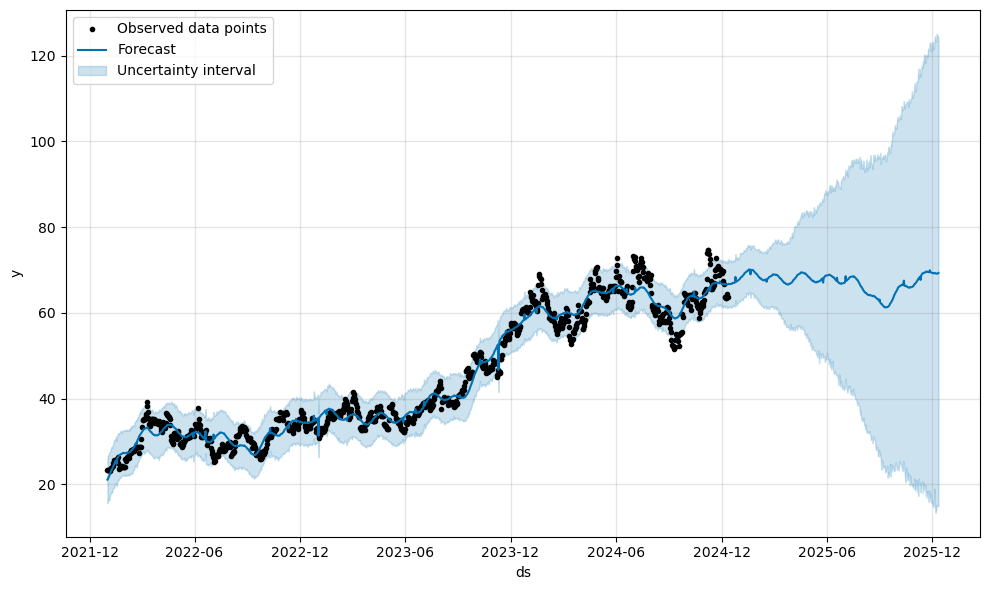

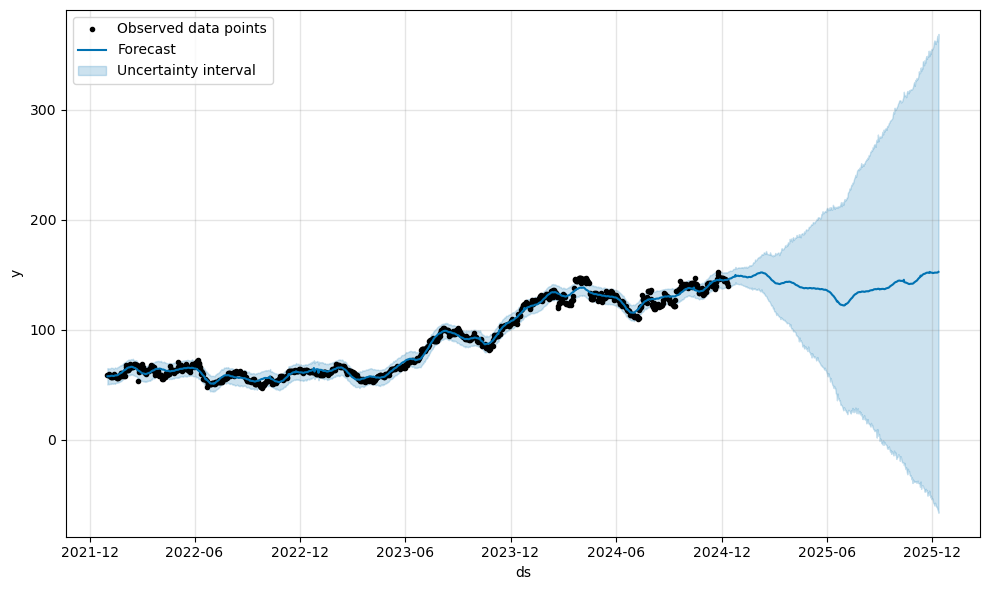

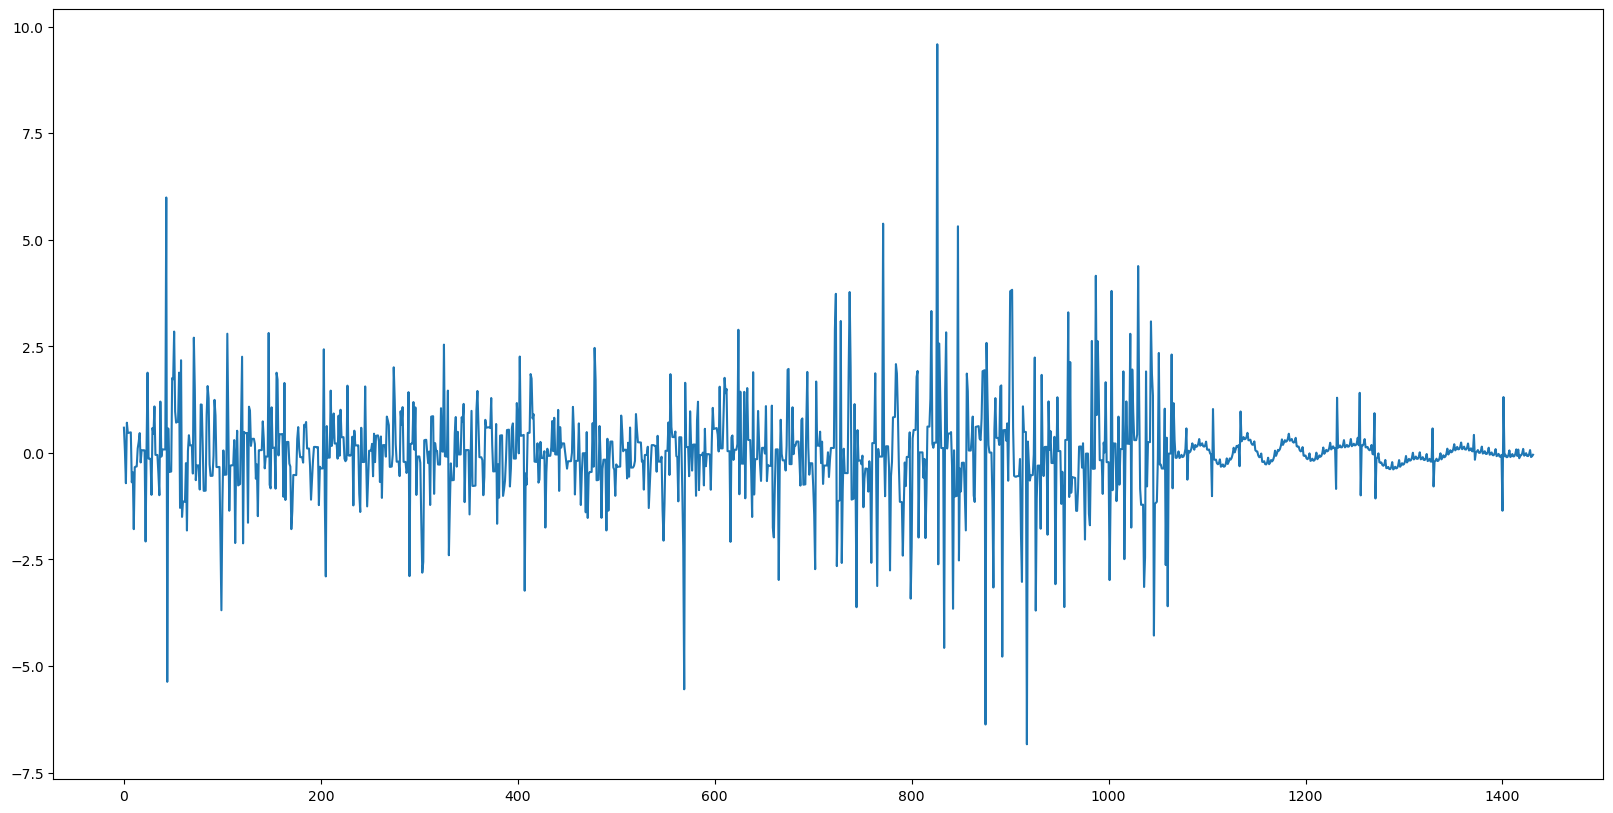

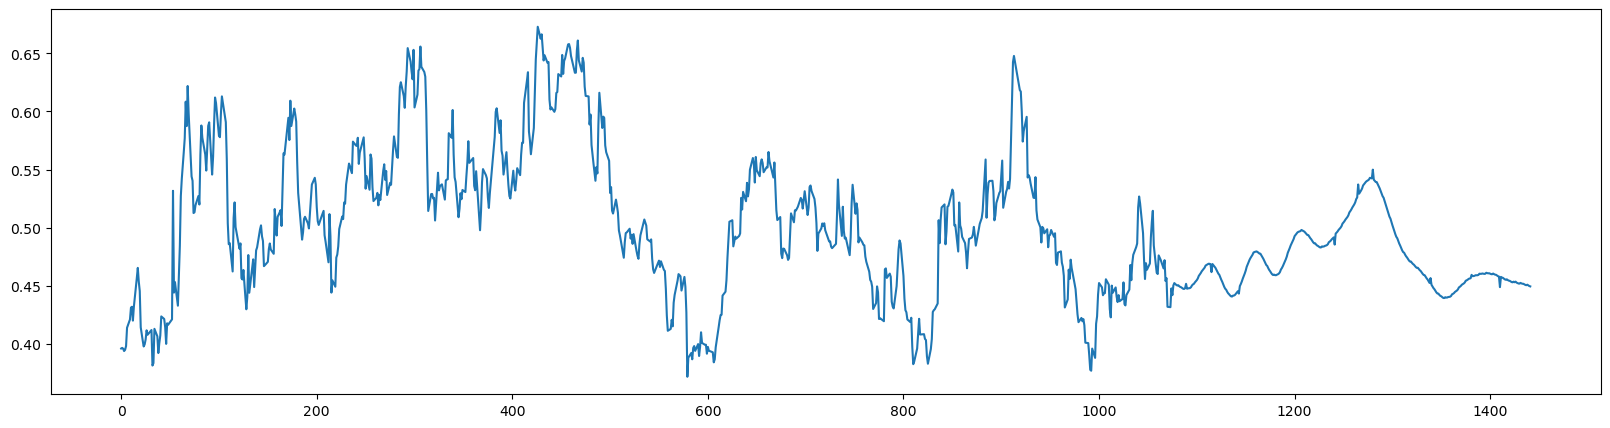

In [82]:
def train_prophet_model(data):
    # if data.equals(first_stock_data) == True:
    model = Prophet(
        interval_width=0.95,
        changepoint_prior_scale= best_params['changepoint_prior_scale'],
        holidays_prior_scale=15,
        seasonality_prior_scale= best_params['seasonality_prior_scale'],
        weekly_seasonality= True,
        yearly_seasonality= True,
        daily_seasonality=False,
    )
    model.add_country_holidays(country_name="US")
    model.fit(data)
    return model

def generate_forecast(model, periods=365):
    future = model.make_future_dataframe(periods=periods)
    forecast = model.predict(future)
    return forecast


def plot_forecast(model, forecast):
    model.plot(forecast, include_legend = True)

adj_close_data.reset_index(inplace=True)
adj_close_data.rename(columns={"index":"ds"},inplace=True)
for i in lst:
    # Extract the data of the 2 stocks in the pair individually
    first_stock_data = adj_close_data[['ds', pairs[i][1]]]
    second_stock_data = adj_close_data[['ds',pairs[i][0]]]

    # Rename the stock price column to y
    first_stock_data.rename(columns={pairs[i][1]:"y"},inplace=True)
    second_stock_data.rename(columns={pairs[i][0]:"y"},inplace=True)
    first_stock_data['ds'] = first_stock_data['ds'].dt.to_timestamp()
    second_stock_data['ds'] = second_stock_data['ds'].dt.to_timestamp()

    # Fine-Tuning Hyperparameter for the Prophet prediction model
    param_grid = {  
        'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
        'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],
    }

    # Generate all combinations of parameters
    all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
    rmses = []  # Store the RMSEs for each params here

    # Use cross validation to evaluate all parameters
    for params in all_params:
        m = Prophet(**params).fit(first_stock_data)  # Fit model with given params
        df_cv = cross_validation(m, initial= f'{int(len(adj_close_data) * 70/100)} days', period= f'{int(len(adj_close_data) * 70/600)} days', horizon= f'{int(len(adj_close_data) * 70/300)} days', parallel="processes")
        df_p = performance_metrics(df_cv, rolling_window=1)
        rmses.append(df_p['rmse'].values[0])

    # Find the best parameters
    tuning_results = pd.DataFrame(all_params)
    tuning_results['rmse'] = rmses

    # Generate all combinations of parameters
    all_params1 = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
    rmses1 = []  # Store the RMSEs for each params here

    # Use cross validation to evaluate all parameters
    for params in all_params1:
        m = Prophet(**params).fit(second_stock_data)  # Fit model with given params
        # df_cv = cross_validation(m, cutoffs=cutoffs, horizon='365 days', parallel="processes")
        df_cv = cross_validation(m, initial= f'{int(len(adj_close_data) * 70/100)} days', period= f'{int(len(adj_close_data) * 70/600)} days', horizon= f'{int(len(adj_close_data) * 70/300)} days', parallel="processes")
        df_p = performance_metrics(df_cv, rolling_window=1)
        rmses1.append(df_p['rmse'].values[0])

    # Find the best parameters
    tuning_results1 = pd.DataFrame(all_params1)
    tuning_results1['rmse'] = rmses1

    best_params = all_params[np.argmin(rmses)]
    best_params1 = all_params1[np.argmin(rmses1)]

    #Train Prophet model
    first_model = train_prophet_model(first_stock_data)

    # Generate forecast
    first_forecast = generate_forecast(first_model)
    
    #plot_forecast(first_model, first_forecast)
    
    #Train Prophet model
    second_model = train_prophet_model(second_stock_data)

    # Generate forecast
    second_forecast = generate_forecast(second_model)

    # Plot forecast
    model_list = []
    model_list.append(first_model)
    model_list.append(second_model)
    
    forecast_list = []
    forecast_list.append(first_forecast)
    forecast_list.append(second_forecast)
    
    for j in zip(model_list, forecast_list):
        plot_forecast(j[0], j[1])

    # Filling out predicted to observed data for each pair
    # Reset index
    first_stock_data = first_stock_data.set_index('ds')

    # Filter out future prices from known ones
    rslt_df = first_forecast[first_forecast['ds'] > end_date] 
    rslt_df = rslt_df.set_index('ds')
    rslt_df = rslt_df['yhat']
    result = first_stock_data['y']._append(rslt_df)
    result.index.to_period("D")

    second_stock_data = second_stock_data.set_index('ds')

    # Filter out future prices from known ones
    rslt_df1 = second_forecast[second_forecast['ds'] > end_date] 
    rslt_df1= rslt_df1.set_index('ds')
    rslt_df1 = rslt_df1['yhat']
    result1 = second_stock_data['y']._append(rslt_df1)
    result1.index.to_period("D")
    
    mkf = MyKalmanFilter(delta=1e-4, R=1e-3)
    series = []
    # Create a new DataFrame
    df = pd.DataFrame({
        pairs[0][1]: result,
        pairs[0][0]: result1
    })
    for idx, row in df.iterrows():
        x, P, K, z_hat = mkf.step_forward(row[pairs[0][1]], row[pairs[0][0]])
        series.append(row[pairs[0][1]] - z_hat.squeeze())

    # Plot the combined portfolio
    plt.figure(figsize=(20,10))
    plt.plot(series[10:])

    # Plot the hedge ratio over time
    plt.figure(figsize=(20,5))
    plt.plot(mkf.x[0, 1:])
    
    Kalman_Filter = True
    trading_simulation(result, result1, 10, 60, 1000000, 50000, Kalman_Filter)


In [83]:
trade_log = trading_simulation(result, result1, 10, 60, 1000000, 50000, Kalman_Filter)[5]
trade_log

C:\Users\buitu\AppData\Local\Temp\ipykernel_74156\3048990091.py:59: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  trading_log = pd.concat([trading_log, pd.DataFrame([


The total profit between 2022-01-01 and 2025-12-12 was $-218564.53
57 trades where the price ratio was high were executed; they were profitable 49.12% of the time, with a largest single gain of $1931.18, and a largest single loss of $1716.66
50 trades where the price ratio was low were executed they were profitable 44.00% of the time, with a largest single gain of $51359.80, and a largest single loss of $80206.24


,Date,Asset,Action,Price,Quantity,Trade_Type
0,2022-01-01,HCC,Sell,23.418,427.0,High
1,2022-01-01,BCC,Buy,58.9627,169.0,High
0,2022-01-02,HCC,Sell,23.3571,427.0,Close
1,2022-01-02,BCC,Sell,58.9019,169.0,Close
0,2022-01-03,HCC,Sell,23.2963,427.0,Close
...,...,...,...,...,...,...
1,2025-12-10,BCC,Sell,151.98535574165882,3350.0,Close
0,2025-12-11,HCC,Sell,69.16949388354482,7387.0,Close
1,2025-12-11,BCC,Sell,152.2288443675825,3350.0,Close
0,2025-12-12,HCC,Sell,69.30767461740476,7387.0,Close


In [84]:
import datetime
today = pd.Timestamp(datetime.date.today())
print(today)
result = trade_log.loc[trade_log['Date'] == today]
print(result)

2024-12-15 00:00:00
        Date Asset Action             Price  Quantity Trade_Type
0 2024-12-15   HCC   Sell 66.71076343161286     155.0      Close
1 2024-12-15   BCC   Sell 146.4628750958628      70.0      Close


In [107]:
df_p

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,251 days,22714.414760775086,150.71302120512044,138.3033397756456,1.0471440300952104,1.2538371027713355,0.656436353290165,0.0
